In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import DataFrame
import random
import pandas as pd
import numpy as np

In [7]:
import numpy as np
from pandas import DataFrame, MultiIndex, concat, DatetimeIndex, Series
from math import sqrt
from scipy.stats import t, pearsonr, spearmanr
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from pca import pca
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

from matplotlib import pyplot as plt
import seaborn as sb
import sys

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from tabulate import tabulate

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_excel("빚추가마지막.xlsx")
df.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


### 맨 먼저 해야하는 건 다른 변수 들 중 소득 및 빚에 따른 우울감 차이를 볼거기 떄문에 소득과 빚이 있는 사람들로 기준을 잡아서 데이터를 전처리 및 분석할 것임

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13474 entries, 0 to 13473
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13474 non-null  int64  
 1   gen              13474 non-null  object 
 2   age              13474 non-null  int64  
 3   religion         13474 non-null  object 
 4   edu              13474 non-null  object 
 5   sm_year          1119 non-null   float64
 6   sm_state         13474 non-null  object 
 7   sm_day           2036 non-null   float64
 8   dr_mean_year     13474 non-null  object 
 9   dr_6cup          5711 non-null   object 
 10  dr_hurt          5711 non-null   object 
 11  dr_worry         5711 non-null   object 
 12  preg_experience  13474 non-null  object 
 13  health_state     13474 non-null  int64  
 14  disabled         13474 non-null  object 
 15  work_state       13474 non-null  object 
 16  work_code        8058 non-null   float64
 17  region      

In [6]:
df= df.loc[(df['income']>0)&(df['debt']>0),:]
df = df.iloc[:,1:]

In [7]:
df

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,work,151.0,city,2290.8,21,1020.0,0
9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,2290.8,17,1020.0,0
13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,...,남성,4,abled,work,399.0,city,5958.0,20,12921.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,male,47,no,대졸이상,25.0,yes,10.0,주2~3회,주1회,전혀,...,남성,4,abled,work,151.0,city,8548.0,17,26014.0,0
13470,female,46,no,대졸이상,NaN,no,NaN,주2~3회,연1회,전혀,...,없다,4,abled,nowork,NaN,city,8548.0,17,26014.0,0
13471,male,48,no,대졸이상,25.0,yes,7.0,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,222.0,city,8452.0,17,12360.0,0
13472,male,59,yes,대졸이상,32.0,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,248.0,city,7094.0,18,1902.0,0


## 데이터 확인 
### 연속형 변수들의 데이터 확인 및 전처리

In [8]:
df.describe()

,age,sm_year,sm_day,health_state,work_code,income,y_total,debt,y_train
count,5414.000000,383.000000,1048.000000,5414.000000,3801.000000,5414.000000,5414.000000,5414.000000,5414.000000
mean,51.013668,24.856397,14.953244,3.648134,546.257564,6628.044847,18.580901,10158.879405,0.095308
std,16.726448,14.922584,7.538168,0.861421,270.564329,3995.165853,2.982555,13604.478757,0.293668
min,17.000000,0.000000,1.000000,1.000000,111.000000,1.000000,11.000000,3.000000,0.000000
25%,39.000000,11.500000,10.000000,3.000000,312.000000,3851.500000,17.000000,2096.000000,0.000000
50%,50.000000,25.000000,15.000000,4.000000,510.000000,6113.500000,17.000000,6200.000000,0.000000
75%,63.000000,35.000000,20.000000,4.000000,842.000000,8556.000000,19.000000,13000.000000,0.000000
max,101.000000,68.000000,50.000000,5.000000,1009.000000,65676.000000,38.000000,256400.000000,1.000000


<Axes: xlabel='sm_day', ylabel='y_total'>

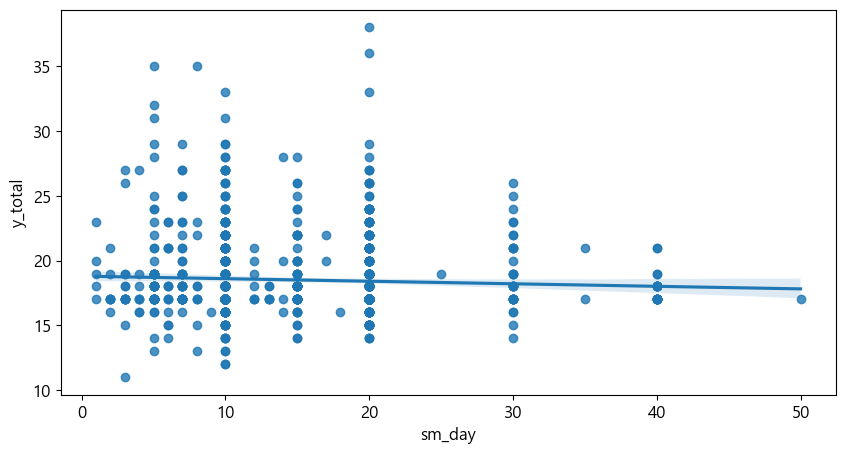

In [9]:
sns.regplot(data=df,x='sm_day',y='y_total')

<Axes: xlabel='sm_year', ylabel='y_total'>

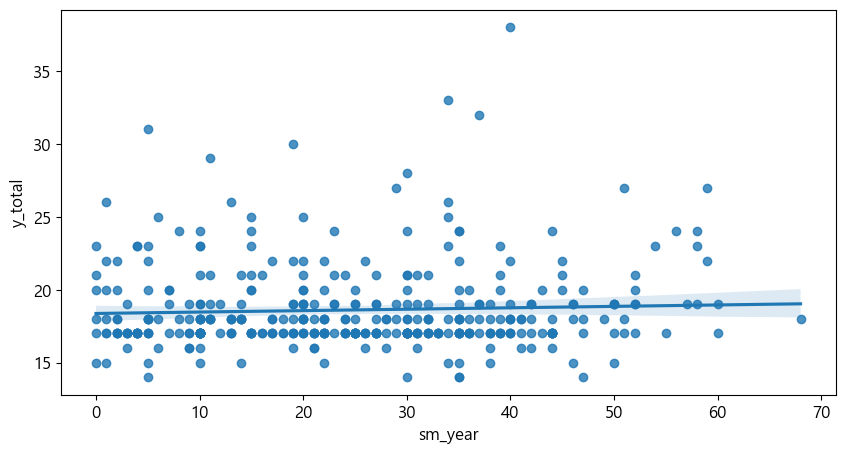

In [10]:
sns.regplot(data=df,x='sm_year',y='y_total')

<Axes: xlabel='income', ylabel='y_total'>

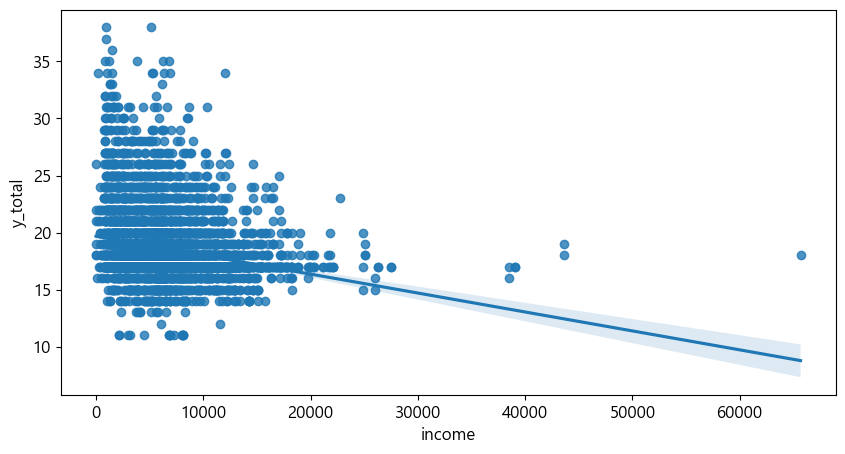

In [11]:
sns.regplot(data=df,x='income',y='y_total')

<Axes: xlabel='debt', ylabel='y_total'>

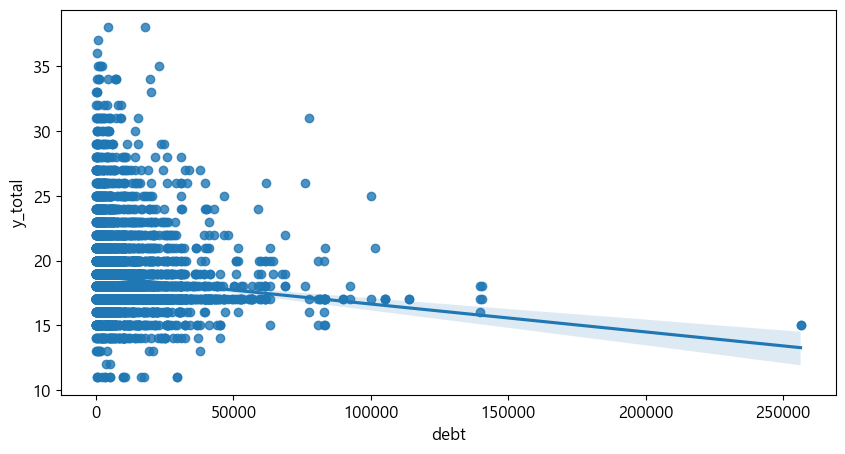

In [12]:
sns.regplot(data=df,x='debt',y='y_total')

In [13]:
## 시각화를 진행 한 결과, income이랑 debt가 상관성이 있어보여서 상관분석 진행함.

In [14]:
corr  = df[['income', 'debt' ,'y_total']].corr()
corr

,income,debt,y_total
income,1.000000,0.300693,-0.222360
debt,0.300693,1.000000,-0.098187
y_total,-0.222360,-0.098187,1.000000


In [15]:
## 근데 income과 debt의 단위는 같지만 기초통계량을 확인해 본 결과 스케일 차이가 나는거 같아서 로그변환 진행

In [16]:
df['income'] = np.log1p(df['income'])
df['debt'] = np.log1p(df['debt'])

df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,6.006353,20,9.244838,0
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,762.0,city,7.742836,18,9.962747,0
8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,work,151.0,city,7.737093,21,6.928538,0
9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,7.737093,17,6.928538,0
13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,...,남성,4,abled,work,399.0,city,8.692658,20,9.466687,0


#### 연속형 변수의 데이터 분포 확인

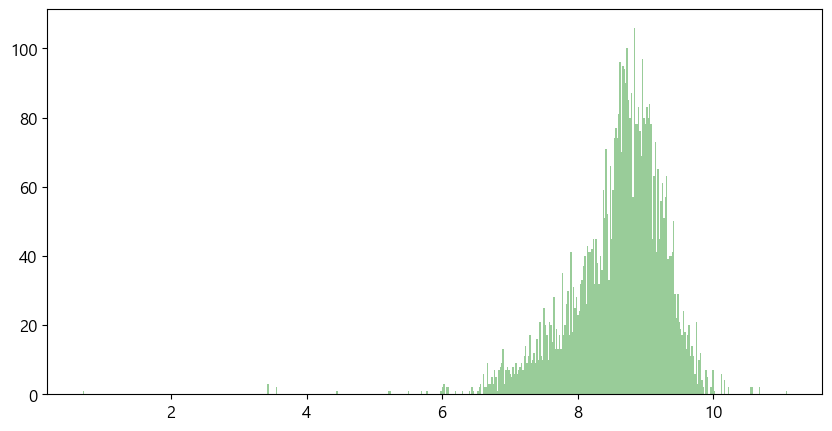

In [17]:
plt.hist(df['income'], color = 'green', alpha = 0.4, bins = 500)
plt.show()

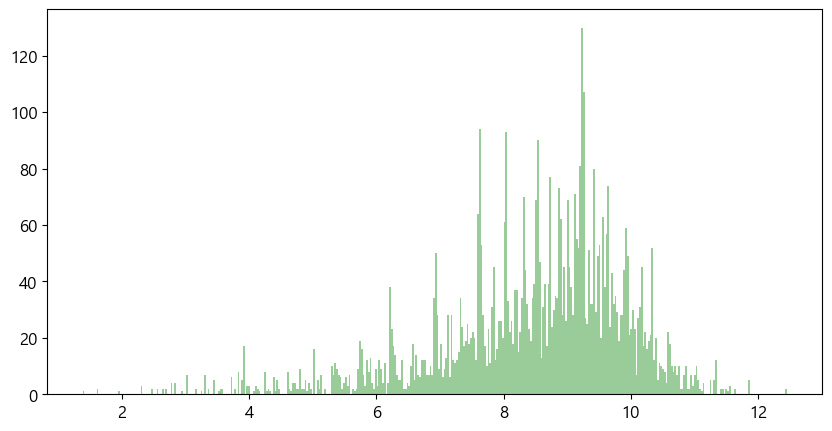

In [18]:
plt.hist(df['debt'], color = 'green', alpha = 0.4, bins = 400)
plt.show()

## 명목형 변수의 데이터 확인 및 전처리

### 나이변수의 범주화 - > 파생변수 추가

In [19]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,53,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,31,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,45,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [20]:
df.drop('age',axis=1,inplace=True)
df.head()

,gen,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [21]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

In [22]:
## 명목형 변수 
## gen religion edu sm_state dr_mean_year dr_6cup dr_hurt dr_worry preg_experience health_state disabled work_state income age_range


## 명목형 변수의 빈도수 확인

In [23]:
cnames = ['gen' ,'religion' ,'edu' ,'sm_state' ,'dr_mean_year','dr_6cup' ,'dr_hurt' ,'dr_worry' ,'preg_experience', 'health_state','disabled', 'work_state','age_range']

In [24]:
df['gen'].value_counts()

gen
female    2887
male      2527
Name: count, dtype: int64

In [25]:
df['religion'].value_counts()

religion
no     3015
yes    2399
Name: count, dtype: int64

In [26]:
df['edu'].value_counts()

edu
대졸이상    2686
고졸      1690
초졸이하     607
중졸       431
Name: count, dtype: int64

In [27]:
df['sm_state'].value_counts()

sm_state
no     4366
yes    1048
Name: count, dtype: int64

In [28]:
df['dr_mean_year'].value_counts()

dr_mean_year
전혀마시지않음    2459
월2~3회      1127
주2~3회       807
월1회         662
주4회이상       359
Name: count, dtype: int64

In [29]:
df['dr_6cup'].value_counts()

dr_6cup
전혀     1052
월1회     607
주1회     568
연1회     546
매일      182
Name: count, dtype: int64

In [30]:
df['dr_hurt'].value_counts()

dr_hurt
전혀      2881
과거존재      61
최근존재      13
Name: count, dtype: int64

In [31]:
df['dr_worry'].value_counts()

dr_worry
전혀      2650
최근존재     214
과거존재      91
Name: count, dtype: int64

In [32]:
df['preg_experience'].value_counts()


preg_experience
없다    2830
남성    2527
있다      57
Name: count, dtype: int64

In [33]:
df['health_state'].value_counts()


health_state
4    3150
3     995
2     645
5     563
1      61
Name: count, dtype: int64

In [34]:
df['disabled'].value_counts()


disabled
abled       5096
disabled     318
Name: count, dtype: int64

In [35]:
df['work_state'].value_counts()


work_state
work      3801
nowork    1613
Name: count, dtype: int64

In [36]:
df['age_range'].value_counts()


age_range
60세 이상    1729
40~49세    1176
50~59세    1086
30~39세     758
19~29세     656
Name: count, dtype: int64

In [37]:
cnames

['gen',
 'religion',
 'edu',
 'sm_state',
 'dr_mean_year',
 'dr_6cup',
 'dr_hurt',
 'dr_worry',
 'preg_experience',
 'health_state',
 'disabled',
 'work_state',
 'age_range']

## 데이터의 분포 확인  :  명목형 변수들의 y_train에 따른 차이 확인

### 전체적인 경향성은 나이가 많아질수록 우울감이 높게 나타난다. 특히 노년층의 우울감은 굉장히 높다

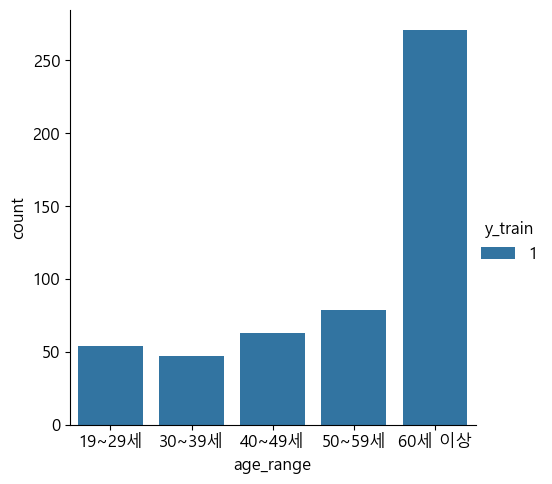

In [38]:
sns.catplot(data=df.loc[df['y_train']==1],x='age_range',kind='count',hue='y_train')

종교에 따른 우울감 경험여부는 차이가 없는것으로 보임

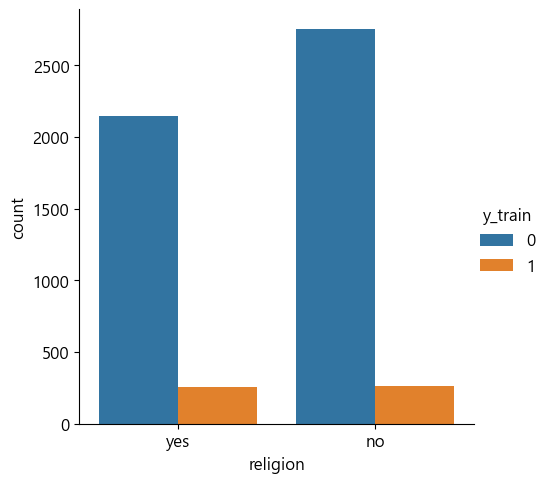

In [39]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

교육수준에 따른 우울감 경험여부의 비율은 초졸인 사람들이 가장높았음.

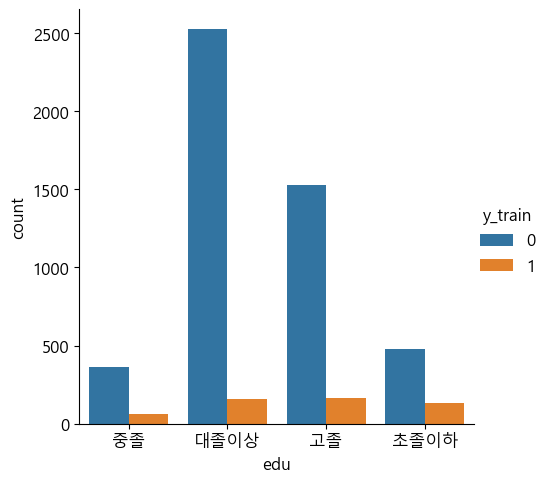

In [40]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')
plt.show()
plt.close()

흡연여부는 애매함. -> 다운샘플링 진행

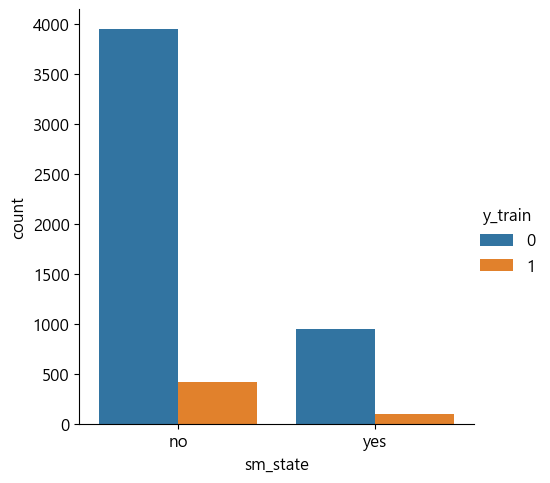

In [41]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [42]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =1048 ,
                            random_state = 2020)
                            


In [43]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

### 흡연 기간에 따른 우울감 점수 차이 없음


In [44]:
df.head()

,gen,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [45]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()

sm_state
yes    1048
no     1048
Name: count, dtype: int64

별차이 없음>


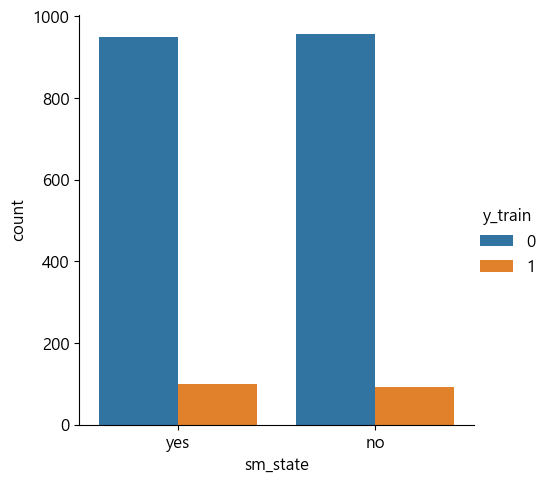

In [46]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

연평균 음주량도 별 차이 없어보임.

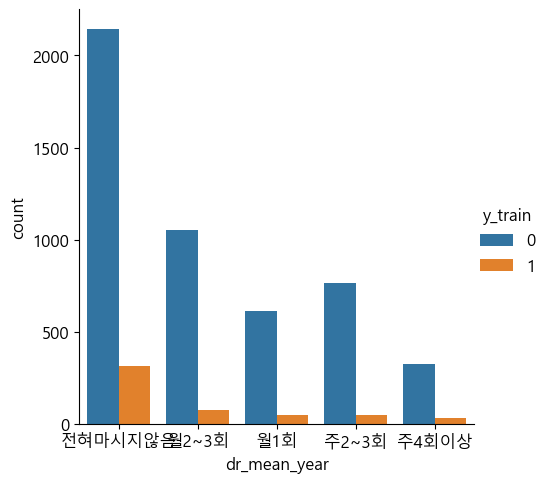

In [47]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [48]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

술을 한번마실때 6잔 이상 마시는 사람들이 우울감을 느끼는가에 대한 가설은 의미 x

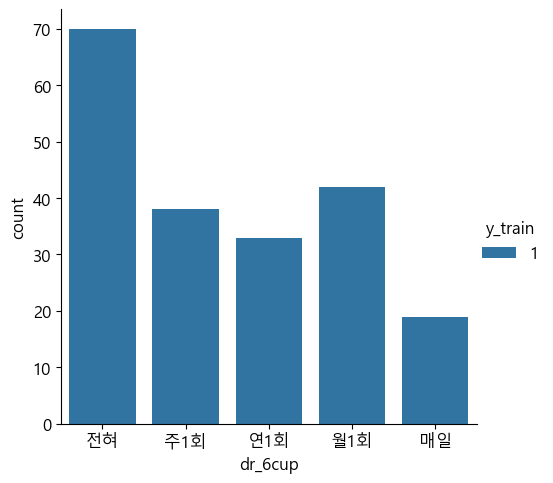

In [49]:
sns.catplot(data=over_dr.loc[over_dr['y_train']==1],x='dr_6cup',kind='count',hue='y_train')

임신경험 여부는 별 차이 없음

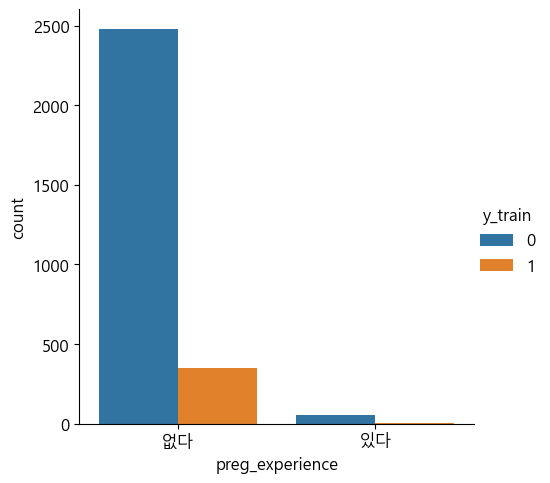

In [50]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [51]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =57 ,
                            random_state = 2020)

In [52]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
있다    57
없다    57
Name: count, dtype: int64

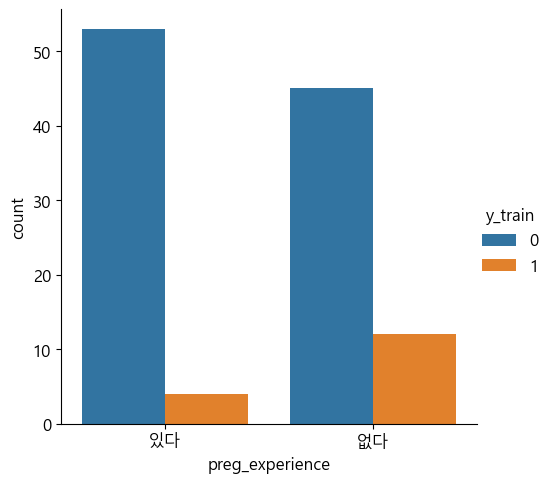

In [53]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

건강 만족도가 높아지면 우울감을 경험하는 경우가 적다.

,health_state,y_total
health_state,1.000000,-0.342151
y_total,-0.342151,1.000000


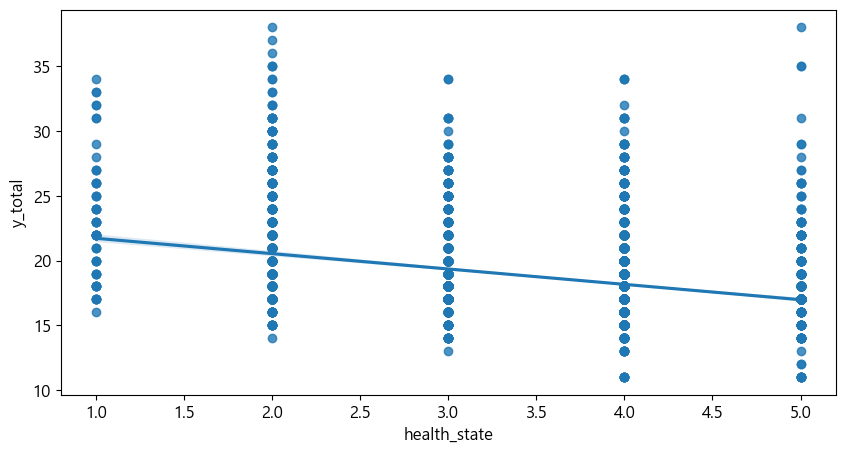

In [54]:
sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

장애여부는 데이터의 크기 차이가 심해서 비교하기 애매함 -> 다운샘플링

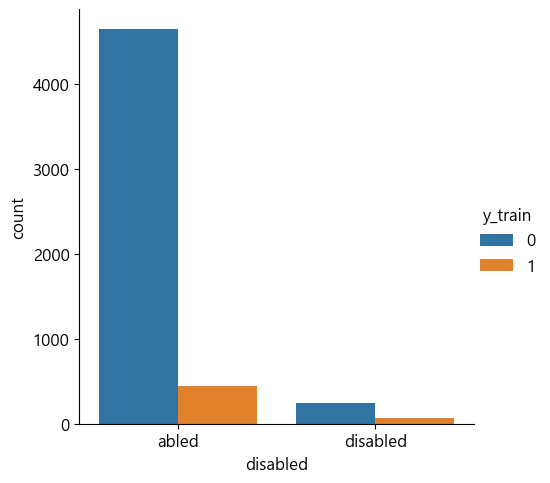

In [55]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [56]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =319 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
abled       319
disabled    318
Name: count, dtype: int64

차이 있음

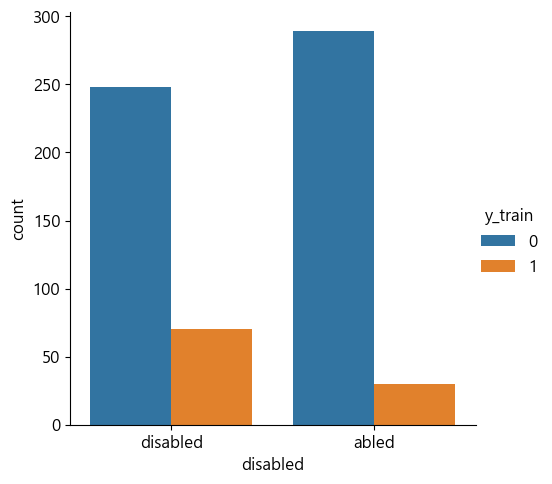

In [57]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [58]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

노동여부에 따라 차이 많이 남

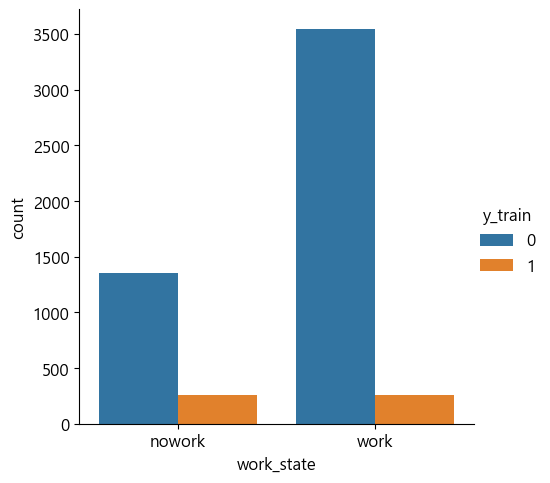

In [59]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

사는 지역에 따라 우울감 경험의차이는 없ㅇ므

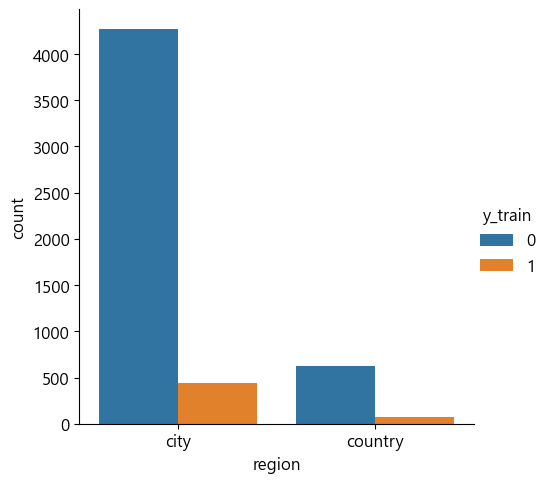

In [60]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [61]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =696 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    696
city       696
Name: count, dtype: int64

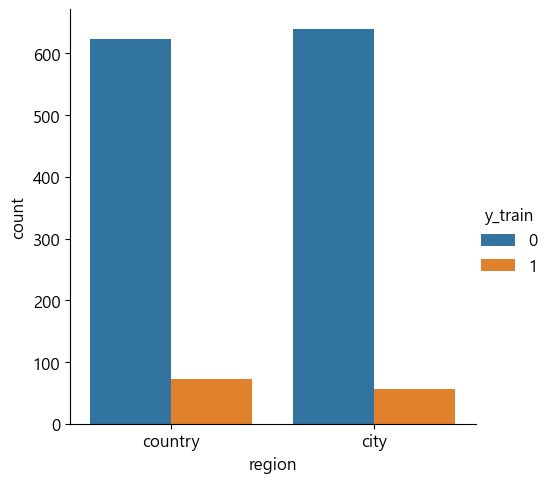

In [62]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

성별에 따른 차이 잇음

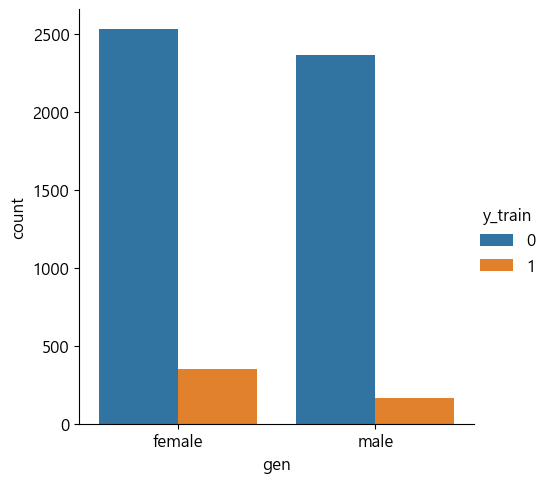

In [63]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [64]:
df.head()

,gen,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,...,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train,age_range
0,female,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,6.006353,20,9.244838,0,60세 이상
2,male,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,4,abled,work,762.0,city,7.742836,18,9.962747,0,60세 이상
8,female,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,work,151.0,city,7.737093,21,6.928538,0,50~59세
9,female,no,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,...,2,abled,nowork,NaN,city,7.737093,17,6.928538,0,30~39세
13,male,no,대졸이상,NaN,yes,14.0,월2~3회,연1회,전혀,전혀,...,4,abled,work,399.0,city,8.692658,20,9.466687,0,40~49세


In [65]:
df.columns

Index(['gen', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

## 변수 골라내기 

In [66]:
df = df.loc[:,['gen','edu','health_state','disabled','work_state','income','y_total','debt','y_train','age_range']]
df.head()

,gen,edu,health_state,disabled,work_state,income,y_total,debt,y_train,age_range
0,female,중졸,2,abled,nowork,6.006353,20,9.244838,0,60세 이상
2,male,대졸이상,4,abled,work,7.742836,18,9.962747,0,60세 이상
8,female,고졸,2,abled,work,7.737093,21,6.928538,0,50~59세
9,female,중졸,2,abled,nowork,7.737093,17,6.928538,0,30~39세
13,male,대졸이상,4,abled,work,8.692658,20,9.466687,0,40~49세


## 변수들의 카테고리화 과정

In [67]:
df['age_range']= df['age_range'].astype('str')
df['age_range'].unique()

array(['60세 이상', '50~59세', '30~39세', '40~49세', '19~29세', 'nan'],
      dtype=object)

In [68]:
df['age_range'] = df['age_range'].fillna(0)
df = df.loc[df['age_range']!=0,:]

In [69]:
df.head()

,gen,edu,health_state,disabled,work_state,income,y_total,debt,y_train,age_range
0,female,중졸,2,abled,nowork,6.006353,20,9.244838,0,60세 이상
2,male,대졸이상,4,abled,work,7.742836,18,9.962747,0,60세 이상
8,female,고졸,2,abled,work,7.737093,21,6.928538,0,50~59세
9,female,중졸,2,abled,nowork,7.737093,17,6.928538,0,30~39세
13,male,대졸이상,4,abled,work,8.692658,20,9.466687,0,40~49세


In [70]:
# df=df.loc[:,['gen','edu','health_state','disabled','work_state','y_train','age_range','log_income','log_debt']]
# df.head()

In [71]:
df.loc[df['gen']=='male','gen']=1
df.loc[df['gen']=='female','gen']=2
df['gen'] = df['gen'].astype('category')

df.loc[df['edu']=='초졸이하','edu']=1
df.loc[df['edu']=='중졸','edu']=2
df.loc[df['edu']=='고졸','edu']=3
df.loc[df['edu']=='대졸이상','edu']=4
df['edu'] = df['edu'].astype('category')

df.loc[df['disabled']=='disabled','disabled']=1
df.loc[df['disabled']=='abled','disabled']=2
df['disabled'] = df['disabled'].astype('category')


df.loc[df['work_state']=='work','work_state']=1
df.loc[df['work_state']=='nowork','work_state']=2
df['work_state'] = df['work_state'].astype('category')

df['age_range'] = df['age_range'].astype('str')
df.loc[df['age_range']=='19~29세','age_range']=1
df.loc[df['age_range']=='30~39세','age_range']=2
df.loc[df['age_range']=='40~49세','age_range']=3
df.loc[df['age_range']=='50~59세','age_range']=4
df.loc[df['age_range']=='60세 이상','age_range']=5
df['age_range'] = df['age_range'].astype('category')


# df= pd.get_dummies(test,drop_first=True,dtype='int')
# df.columns

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5414 entries, 0 to 13473
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   gen           5414 non-null   category
 1   edu           5414 non-null   category
 2   health_state  5414 non-null   int64   
 3   disabled      5414 non-null   category
 4   work_state    5414 non-null   category
 5   income        5414 non-null   float64 
 6   y_total       5414 non-null   int64   
 7   debt          5414 non-null   float64 
 8   y_train       5414 non-null   int64   
 9   age_range     5414 non-null   category
dtypes: category(5), float64(2), int64(3)
memory usage: 281.0 KB


In [73]:
df['health_state'].unique()

array([2, 4, 3, 5, 1], dtype=int64)

In [74]:
### 건강만족도 ㄱㄱ 

ctype = pd.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)

df['health_state'] = df['health_state'].astype(ctype)

df['health_state'].dtypes


CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

## 가설 검정 - 연속형 변수
### 정규성 검정

In [75]:
stats.normaltest(df['income'])

NormaltestResult(statistic=1747.4194887987817, pvalue=0.0)

In [76]:
stats.normaltest(df['debt'])
## 성립 x 

NormaltestResult(statistic=902.8790811642938, pvalue=8.755856035202143e-197)

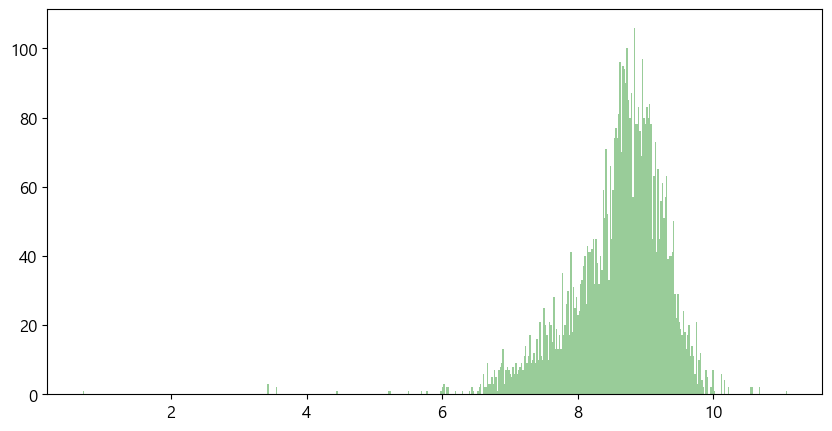

In [77]:
plt.hist(df['income'], color = 'green', alpha = 0.4, bins = 500)
plt.show()


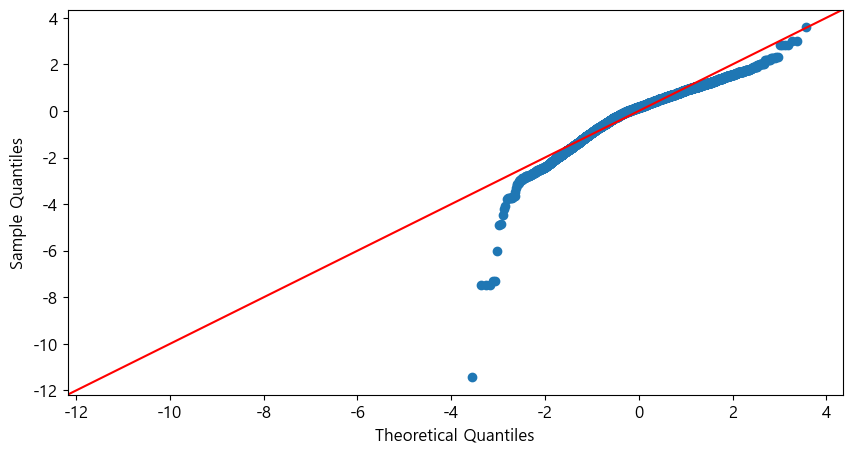

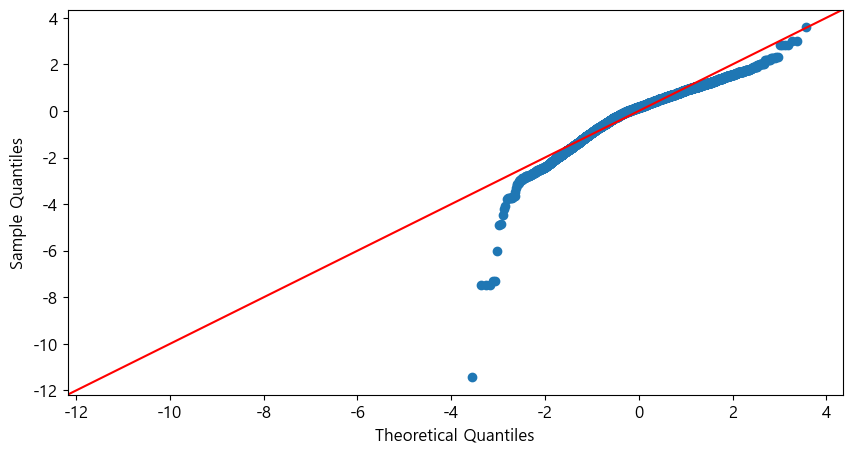

In [78]:
sm.qqplot(df['income'], line='45', fit = True)

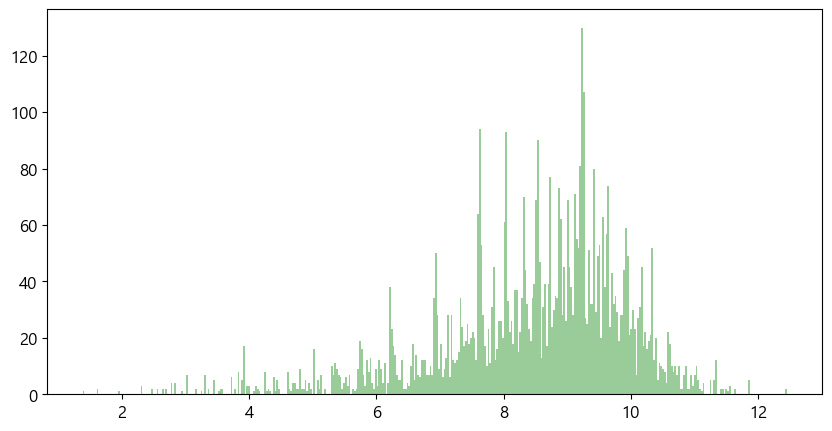

In [79]:
plt.hist(df['debt'], color = 'green', alpha = 0.4, bins = 400)
plt.show()

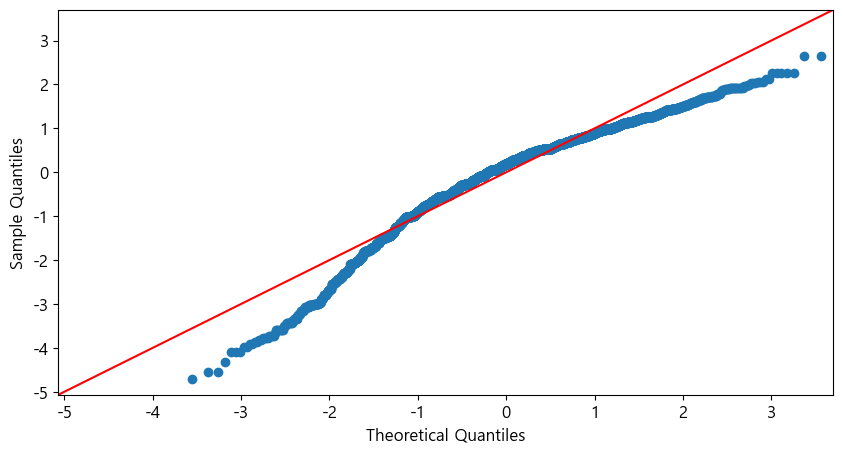

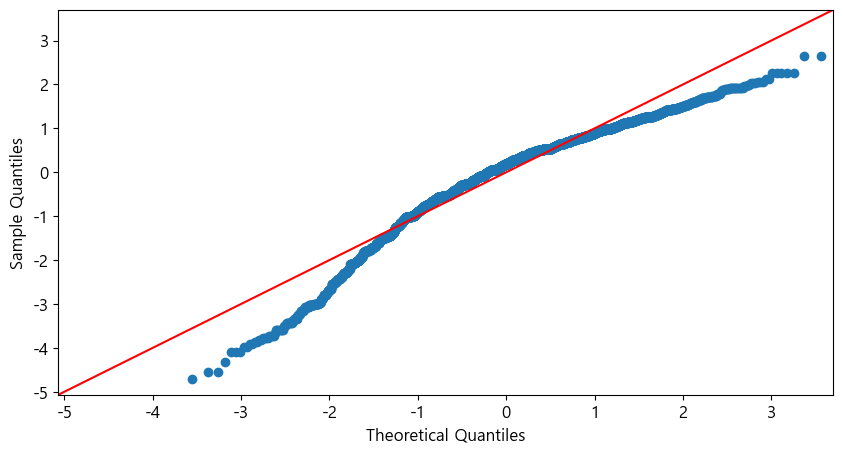

In [80]:
sm.qqplot(df['debt'], line='45', fit = True)

#### 정규성 검정 결과는 p값이 0에 가까우나 표본의 수가 크다는 점과, 히스토그램 및 qq플롯 시각화 결과 어느정도의 정규성을 띄는걸로 확인했기떄문에 정규성을 가정하고 분석을 진행

### 등분산성 
#### 우울감을 느끼는 집단과 안느끼는 집단의 분산이 같은지 검정

In [81]:
data=pd.read_excel("빚추가마지막.xlsx")

In [82]:
train = data.loc[(data['income']>27),:]
train['income'] = np.log1p(train['income'])

C:\Users\user\AppData\Local\Temp\ipykernel_16124\2571767070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['income'] = np.log1p(train['income'])


In [83]:
train.head()

,Unnamed: 0,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,2,abled,nowork,NaN,city,6.006353,20,10350.0,0
1,1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,...,남성,1,abled,work,942.0,city,7.933438,29,0.0,1
2,2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,762.0,city,7.742836,18,21220.0,0
3,3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,...,남성,4,abled,work,855.0,city,8.562549,20,0.0,0
4,4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,...,없다,4,abled,work,399.0,city,8.562549,21,0.0,0


In [84]:
y_income_0 = train.loc[train['y_train']==0,'income']
y_income_1 = train.loc[train['y_train']==1,'income']


In [85]:
stats.levene(y_income_1,y_income_0)

LeveneResult(statistic=0.023232134473999987, pvalue=0.8788572576668049)

In [86]:
y_train_debt_0 = df.loc[df['y_train']==0,'debt']
y_train_debt_1 = df.loc[df['y_train']==1,'debt']

In [87]:
stats.levene(y_train_debt_1,y_train_debt_0)

LeveneResult(statistic=3.6671032100108305, pvalue=0.05554921572874413)

## 명목형 변수의 검정 - 카이제곱 검정 

In [88]:
df.columns

Index(['gen', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'y_total', 'debt', 'y_train', 'age_range'],
      dtype='object')

In [89]:
from scipy.stats import chi2_contingency
result_gen = pd.crosstab(df['gen'],df['y_train'])
chiresult_gen = chi2_contingency(observed=result_gen)
chiresult_gen

Chi2ContingencyResult(statistic=52.82640062154608, pvalue=3.643704777736139e-13, dof=1, expected_freq=array([[2286.15552272,  240.84447728],
       [2611.84447728,  275.15552272]]))

In [90]:
result_edu = pd.crosstab(df['edu'],df['y_train'])
chiresult_edu = chi2_contingency(observed=result_edu)
chiresult_edu

Chi2ContingencyResult(statistic=159.10232692000645, pvalue=2.8631980008510046e-34, dof=3, expected_freq=array([[ 549.14776505,   57.85223495],
       [ 389.92205393,   41.07794607],
       [1528.92870336,  161.07129664],
       [2430.00147765,  255.99852235]]))

In [91]:
result_health_state = pd.crosstab(df['health_state'],df['y_train'])
chiresult_health_state = chi2_contingency(observed=result_health_state)
chiresult_health_state

Chi2ContingencyResult(statistic=447.5737358381009, pvalue=1.4533461899751813e-95, dof=4, expected_freq=array([[  55.18618397,    5.81381603],
       [ 583.52604359,   61.47395641],
       [ 900.16808275,   94.83191725],
       [2849.77835242,  300.22164758],
       [ 509.34133727,   53.65866273]]))

In [92]:
result_disabled = pd.crosstab(df['disabled'],df['y_train'])
chiresult_disabled = chi2_contingency(observed=result_disabled)
chiresult_disabled

Chi2ContingencyResult(statistic=59.51447238967723, pvalue=1.2139806889961367e-14, dof=1, expected_freq=array([[ 287.69190986,   30.30809014],
       [4610.30809014,  485.69190986]]))

In [93]:
result_work_state = pd.crosstab(df['work_state'],df['y_train'])
chiresult_work_state = chi2_contingency(observed=result_work_state)
chiresult_work_state

Chi2ContingencyResult(statistic=118.9403703663307, pvalue=1.0792561563352741e-27, dof=1, expected_freq=array([[3438.73254525,  362.26745475],
       [1459.26745475,  153.73254525]]))

In [94]:
df.head()

,gen,edu,health_state,disabled,work_state,income,y_total,debt,y_train,age_range
0,2,2,2,2,2,6.006353,20,9.244838,0,5
2,1,4,4,2,1,7.742836,18,9.962747,0,5
8,2,3,2,2,1,7.737093,21,6.928538,0,4
9,2,2,2,2,2,7.737093,17,6.928538,0,2
13,1,4,4,2,1,8.692658,20,9.466687,0,3


In [95]:
df = df.drop('y_total',axis=1)


In [96]:
y_data = df['y_train']
new_df = df.drop('y_train',axis=1)
new_df = pd.get_dummies(new_df,drop_first=True,dtype='int')
new_df.head()

,income,debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5,age_range_nan
0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,7.742836,9.962747,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
8,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
9,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0
13,8.692658,9.466687,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [97]:
y_data= pd.DataFrame(y_data,columns=['y_train'])

In [98]:
new_df = new_df.drop('age_range_nan',axis=1)
new_df['y_train'] = y_data['y_train']

In [99]:
def myOls(data, y, x):
    """
    회귀분석을 수행한다.

    Parameters
    -------
    - data : 데이터 프레임
    - y: 종속변수 이름
    - x: 독립변수의 이름들(리스트)
    """

    # 독립변수의 이름이 리스트가 아니라면 리스트로 변환
    if type(x) != list:
        x = [x]

    # 종속변수~독립변수1+독립변수2+독립변수3+... 형태의 식을 생성
    expr = "%s~%s" % (y, "+".join(x))

    # 회귀모델 생성
    model = ols(expr, data=data)
    # 분석 수행
    fit = model.fit()

    # 파이썬 분석결과를 변수에 저장한다.
    summary = fit.summary()

    # 첫 번째, 세 번째 표의 내용을 딕셔너리로 분해
    my = {}

    for k in range(0, 3, 2):
        items = summary.tables[k].data
        # print(items)

        for item in items:
            # print(item)
            n = len(item)

            for i in range(0, n, 2):
                key = item[i].strip()[:-1]
                value = item[i+1].strip()

                if key and value:
                    my[key] = value

    # 두 번째 표의 내용을 딕셔너리로 분해하여 my에 추가
    my['variables'] = []
    name_list = list(data.columns)
    #print(name_list)

    for i, v in enumerate(summary.tables[1].data):
        if i == 0:
            continue

        # 변수의 이름
        name = v[0].strip()

        vif = 0

        # Intercept는 제외
        if name in name_list:
            # 변수의 이름 목록에서 현재 변수가 몇 번째 항목인지 찾기 
            j = name_list.index(name)
            vif = variance_inflation_factor(data, j)

        my['variables'].append({
            "name": name,
            "coef": v[1].strip(),
            "std err": v[2].strip(),
            "t": v[3].strip(),
            "P-value": v[4].strip(),
            "Beta": 0,
            "VIF": vif,
        })

    # 결과표를 데이터프레임으로 구성
    mylist = []
    yname_list = []
    xname_list = []

    for i in my['variables']:
        if i['name'] == 'Intercept':
            continue

        yname_list.append(y)
        xname_list.append(i['name'])

        item = {
            "B": i['coef'],
            "표준오차": i['std err'],
            "β": i['Beta'],
            "t": "%s*" % i['t'],
            "유의확률": i['P-value'],
            "VIF": i["VIF"]
        }

        mylist.append(item)

    table = DataFrame(mylist,
                   index=MultiIndex.from_arrays([yname_list, xname_list], names=['종속변수', '독립변수']))
    
    # 분석결과
    result = "𝑅(%s), 𝑅^2(%s), 𝐹(%s), 유의확률(%s), Durbin-Watson(%s)" % (my['R-squared'], my['Adj. R-squared'], my['F-statistic'], my['Prob (F-statistic)'], my['Durbin-Watson'])

    # 모형 적합도 보고
    goodness = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %s, p < 0.05)." % (y, ",".join(x), "유의하다" if float(my['Prob (F-statistic)']) < 0.05 else "유의하지 않다", my['Df Model'], my['Df Residuals'], my['F-statistic'])

    # 독립변수 보고
    varstr = []

    for i, v in enumerate(my['variables']):
        if i == 0:
            continue
        
        s = "%s의 회귀계수는 %s(p%s0.05)로, %s에 대하여 %s."
        k = s % (v['name'], v['coef'], "<" if float(v['P-value']) < 0.05 else '>', y, '유의미한 예측변인인 것으로 나타났다' if float(v['P-value']) < 0.05 else '유의하지 않은 예측변인인 것으로 나타났다')

        varstr.append(k)

    ols_result = OlsResult()
    ols_result.model = model
    ols_result.fit = fit
    ols_result.summary = summary
    ols_result.table = table
    ols_result.result = result
    ols_result.goodness = goodness
    ols_result.varstr = varstr

    return ols_result

In [100]:
new_df.columns

Index(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2',
       'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2',
       'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4',
       'age_range_5', 'y_train'],
      dtype='object')

In [101]:
class OlsResult:
    def __init__(self):
        self._model = None
        self._fit = None
        self._summary = None
        self._table = None
        self._result = None
        self._goodness = None
        self._varstr = None

In [102]:
tmp = new_df.filter(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5', 'y_train'])

ols_result = myOls(tmp, y='y_train', x=['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     40.83
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          4.54e-121
Time:                        11:49:16   Log-Likelihood:                -738.52
No. Observations:                5414   AIC:                             1511.
Df Residuals:                    5397   BIC:                             1623.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8655      0.066     13.

In [103]:
new_df.head()

,income,debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5,y_train
0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,7.742836,9.962747,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
8,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
9,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0
13,8.692658,9.466687,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [104]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'debt', 'gen_2', 'edu_2', 'edu_3', 'edu_4', 'health_state_2',
       'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2',
       'work_state_2', 'age_range_2', 'age_range_3', 'age_range_4',
       'age_range_5'],
      dtype='object')

In [105]:
from scipy.stats import stats
from statsmodels.formula.api import logit
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


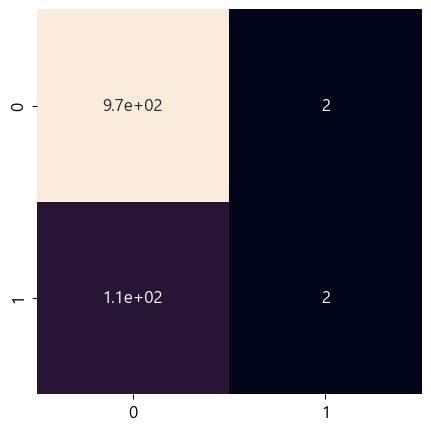

In [106]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()

In [107]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.9003
Precision:0.5000
recall:0.0185
F1:0.0357
roc_auc:0.5082


In [108]:
new_df.head()

,income,debt,gen_2,edu_2,edu_3,edu_4,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,age_range_2,age_range_3,age_range_4,age_range_5,y_train
0,6.006353,9.244838,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,7.742836,9.962747,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
8,7.737093,6.928538,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
9,7.737093,6.928538,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0
13,8.692658,9.466687,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [109]:
new_df = new_df.drop(['debt','edu_2', 'edu_3', 'edu_4', 'age_range_2', 'age_range_3', 'age_range_4', 'age_range_5'], axis=1)
new_df.head()

,income,gen_2,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2,y_train
0,6.006353,1,1,0,0,0,1,1,0
2,7.742836,0,0,0,1,0,1,0,0
8,7.737093,1,1,0,0,0,1,0,0
9,7.737093,1,1,0,0,0,1,1,0
13,8.692658,0,0,0,1,0,1,0,0


In [110]:
tmp = new_df.filter(['income','gen_2', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2','y_train'])
ols_result = myOls(tmp, y='y_train', x=['income','gen_2', 'health_state_2', 'health_state_3', 'health_state_4', 'health_state_5', 'disabled_2', 'work_state_2'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     80.80
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.05e-126
Time:                        11:49:17   Log-Likelihood:                -742.03
No. Observations:                5414   AIC:                             1502.
Df Residuals:                    5405   BIC:                             1561.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8262      0.060     13.

In [111]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'disabled_2', 'work_state_2'],
      dtype='object')

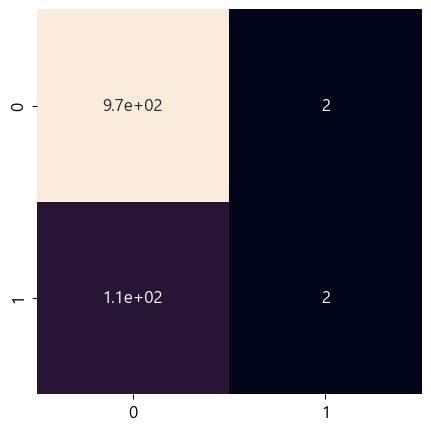

In [112]:
x_tr, x_val, y_tr, y_val = train_test_split(new_df[x_col], new_df['y_train'], test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# conFusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True,  cbar=False, square=True)
# cbar를 통해 colorbar의 유무를 정해 줄 수 있고
# linewidths 각 cell마다 선을 넣어주고 굵기를 정할 수 있다.
# annot 각 cell의 값을 표기할 수 있다. 이때 fmt를 이용해 각 cell 값의 데이터 형태를 지정해주는 과정이 필요할 수 있다.
# vmin, vmax로 색으로 최대값, 최소값을 표현할 수 있다. ex) vmin = 200, vmax=500
plt.show()

In [113]:
x_tr.head()

,income,gen_2,health_state_2,health_state_3,health_state_4,health_state_5,disabled_2,work_state_2
1498,8.397734,1,1,0,0,0,1,0
2382,8.350902,0,0,0,1,0,1,0
2071,8.597667,0,0,0,0,1,1,1
2878,8.971448,1,0,0,1,0,1,0
3291,8.911665,1,0,0,0,1,1,0


In [114]:
x_col = new_df.columns
x_col = x_col[:-1]
x_col

Index(['income', 'gen_2', 'health_state_2', 'health_state_3', 'health_state_4',
       'health_state_5', 'disabled_2', 'work_state_2'],
      dtype='object')

In [115]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred))
print("recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("roc_auc:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.9003
Precision:0.5000
recall:0.0185
F1:0.0357
roc_auc:0.5082


In [116]:
y_tr = pd.DataFrame(y_tr,columns=['y_train'])
x_tr['y_train']= y_tr['y_train']

In [117]:
model = logit('y_train ~ x_tr[x_col]',data=x_tr)
fit = model.fit()
fit.summary()

Optimization terminated successfully.
         Current function value: 0.270277
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_train   No. Observations:                 4331
Model:                          Logit   Df Residuals:                     4322
Method:                           MLE   Df Model:                            8
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.1342
Time:                        11:49:17   Log-Likelihood:                -1170.6
converged:                       True   LL-Null:                       -1352.0
Covariance Type:            nonrobust   LLR p-value:                 1.690e-73
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0250      0.654      4.625      0.000       1.743       4.307
x_tr[x_col][0]    -0.4723      0.072     -6.517      0.000      -0.614      -0.330
x_tr[x_col][1]     0.6266      0.120      5.210      0.000       0.391       0.862
x_tr[x_col][2]    -0.7368      0.311     -2.366      0.018      -1.347      -0.126
x_tr[x_col][3]    -1.5104      0.318     -4.745      0.000      -2.134      -0.886
x_tr[x_col][4]    -2.1006      0.317     -6.637      0.000      -2.721      -1.480
x_tr[x_col][5]    -2.0075      0.371     -5.411      0.000      -2.735      -1.280
x_tr[x_col][6]    -0.2676      0.185     -1.449      0.147      -0.630       0.094
x_tr[x_col][7]     0.4849      0.116      4.178      0.000       0.257       0.712
==================================================================================
"""

In [118]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept') 

,컬럼,VIF
0,x_tr[x_col][0],1.199065
1,x_tr[x_col][1],1.055692
2,x_tr[x_col][2],9.875267
3,x_tr[x_col][3],13.996094
4,x_tr[x_col][4],22.058178
5,x_tr[x_col][5],9.200867
6,x_tr[x_col][6],1.088761
7,x_tr[x_col][7],1.118205


In [119]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape) # 각 피처에 대한 2차항이 추가 되어 피처개수가 늘어난다.
# print(x_train_poly)
# print(x_train)
# 데이터 셋이 6개인 경우 각각의 미지수의 값을 a0, a1, a2로 나눠놨고
# 그것을 미분하여 0이되는 것을 찾기 위하여 제곱, 및 다양한 형태로 새롭게
# 일정하게 수를 규졍했기 때문
# print(x_train_poly)

NameError: name 'x_train' is not defined